Covariance Type: Covariance matrix for all the classes is the same and is σ2 I.
Accuracy: 100.00%
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Precision: [1. 1. 1.], Mean Precision: 1.0
Recall: [1. 1. 1.], Mean Recall: 1.0
F-Measure: [1. 1. 1.], Mean F-Measure: 1.0


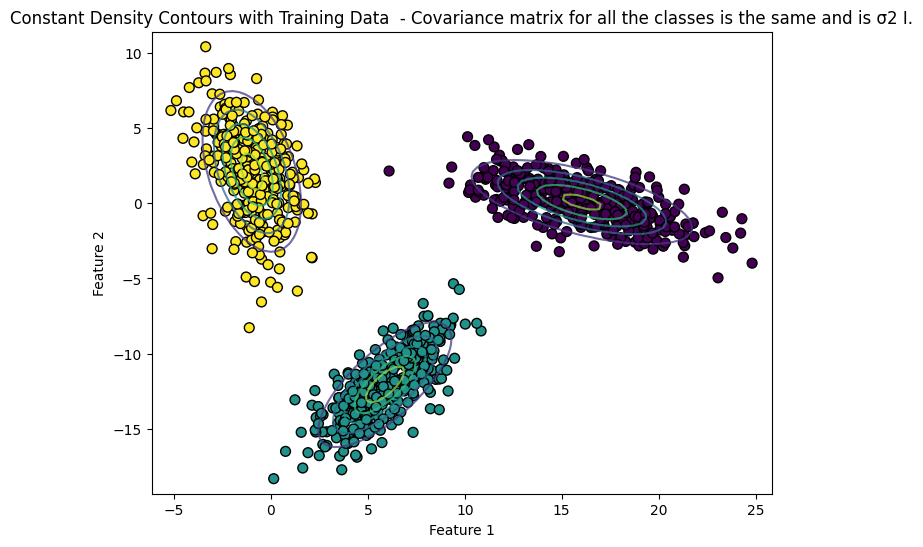

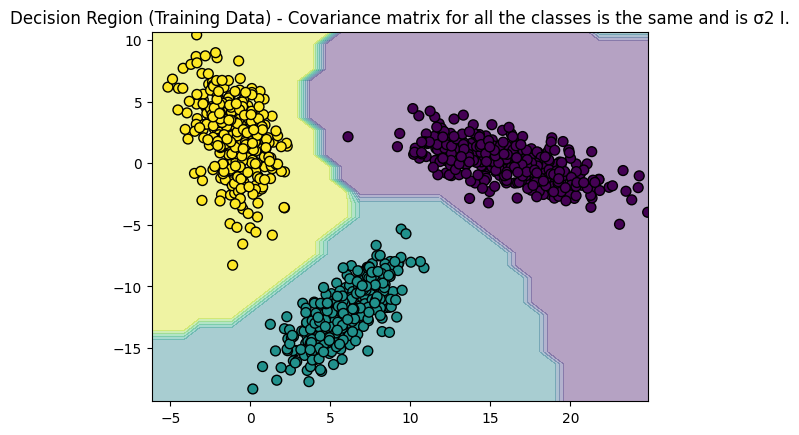

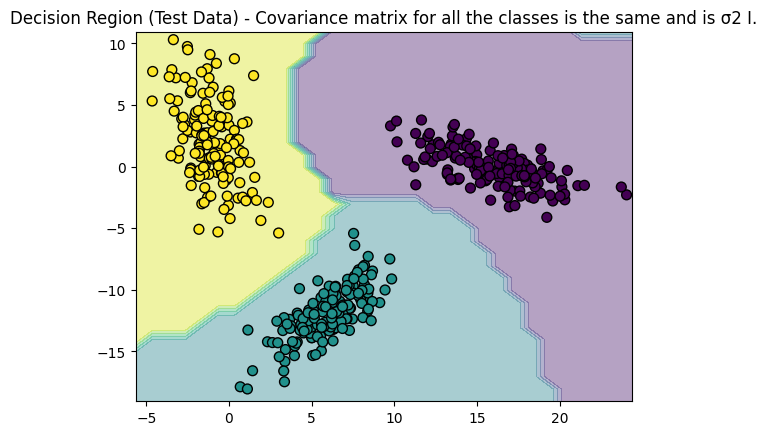

Covariance Type: Full Covariance matrix for all the classes is the same and is Σ.
Accuracy: 100.00%
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Precision: [1. 1. 1.], Mean Precision: 1.0
Recall: [1. 1. 1.], Mean Recall: 1.0
F-Measure: [1. 1. 1.], Mean F-Measure: 1.0


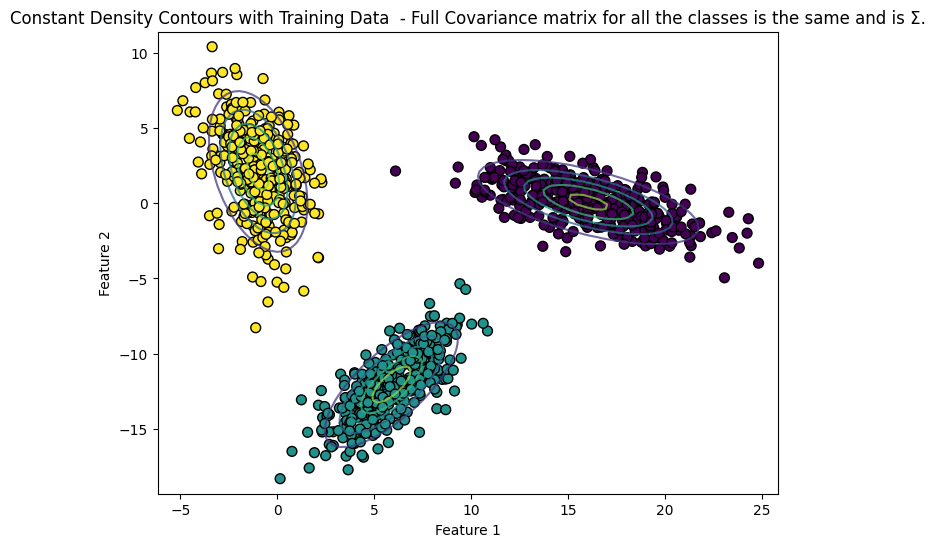

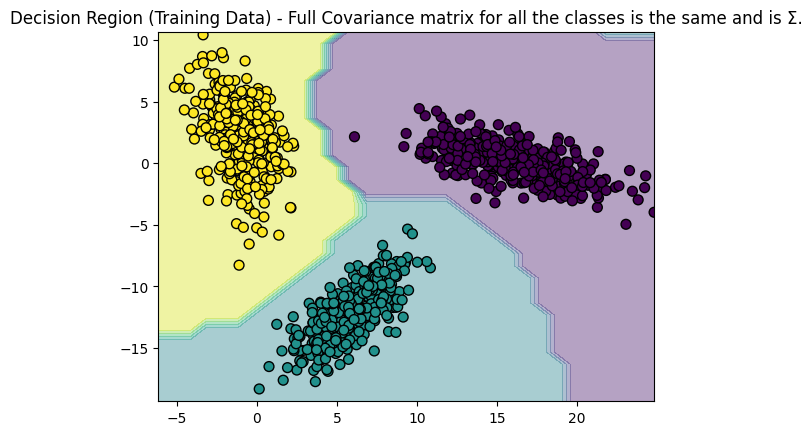

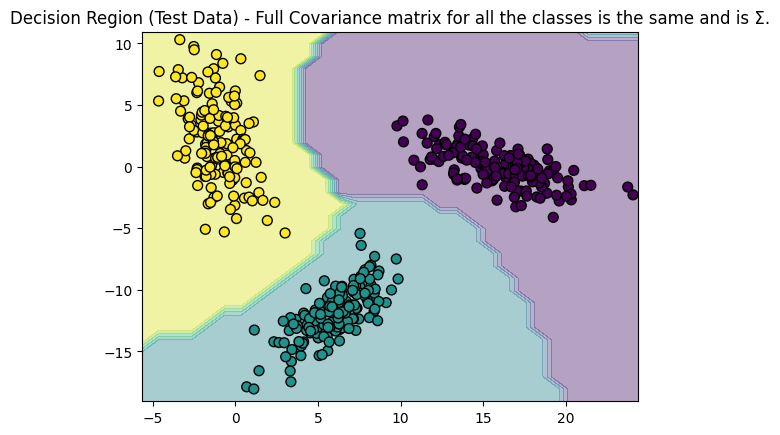

Covariance Type: Covariance matric is diagonal and is different for each class.
Accuracy: 100.00%
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Precision: [1. 1. 1.], Mean Precision: 1.0
Recall: [1. 1. 1.], Mean Recall: 1.0
F-Measure: [1. 1. 1.], Mean F-Measure: 1.0


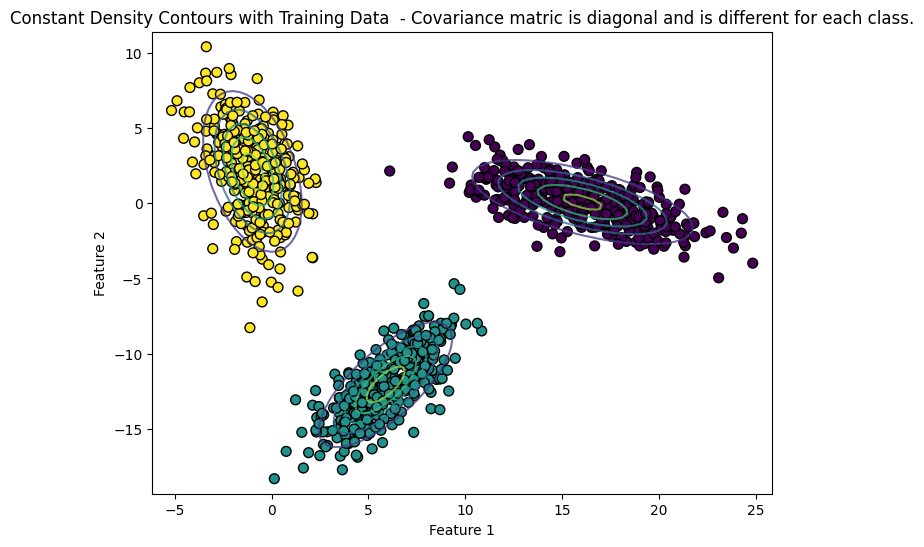

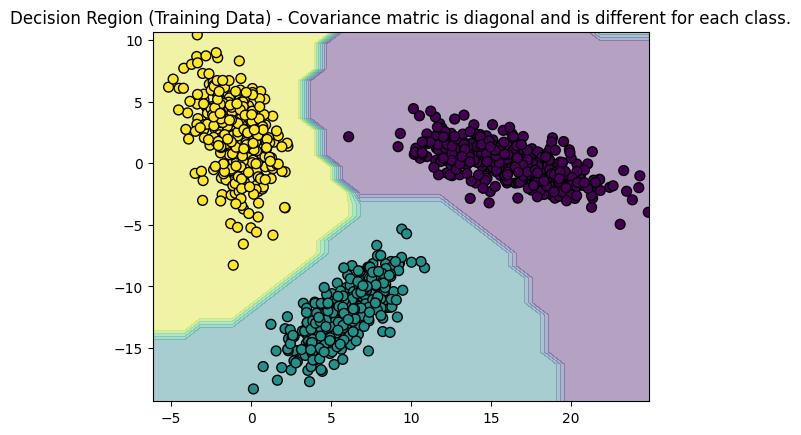

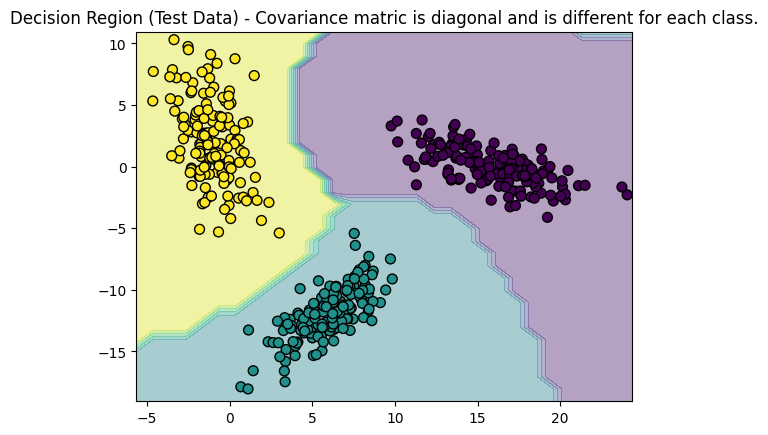

Covariance Type: Full covariance matrix for each class is different.
Accuracy: 100.00%
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Precision: [1. 1. 1.], Mean Precision: 1.0
Recall: [1. 1. 1.], Mean Recall: 1.0
F-Measure: [1. 1. 1.], Mean F-Measure: 1.0


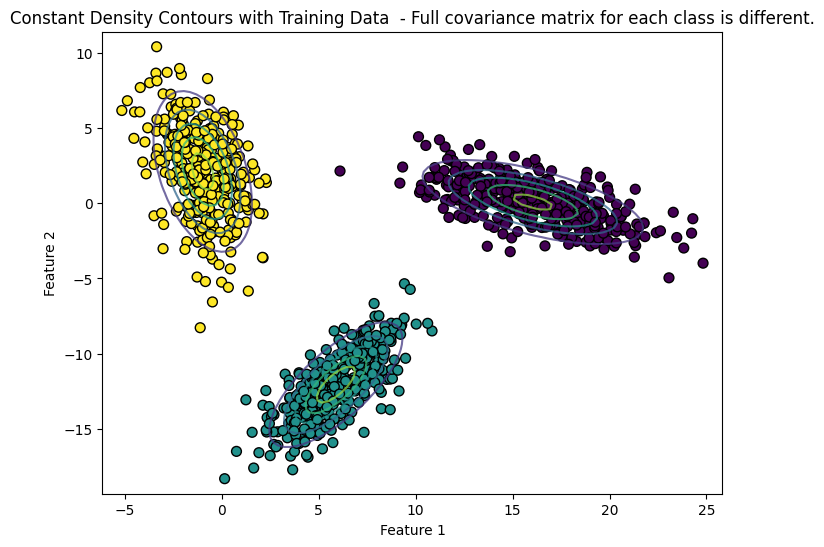

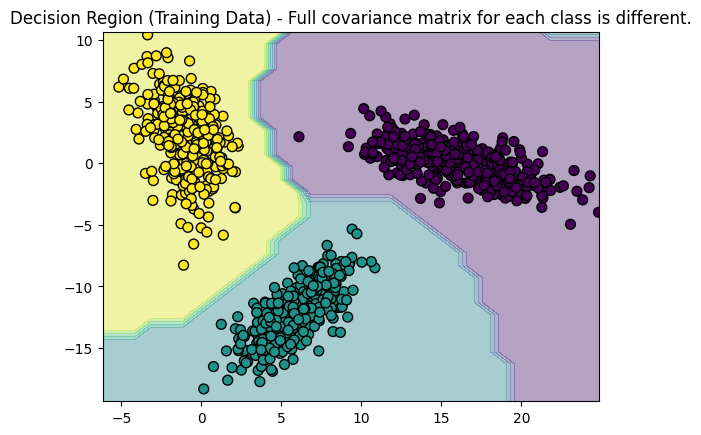

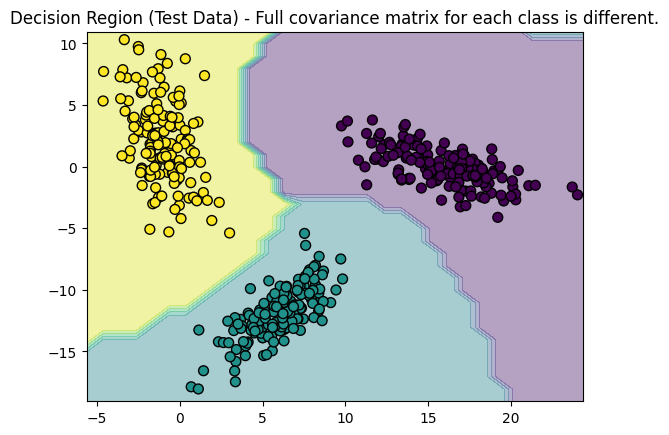

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset for each class from .txt files
def load_class_data(file_name):
    data = np.loadtxt(file_name)
    return data

# Combine all the class data into one dataset
def load_all_data(file_names):
    X, y = [], []
    for i, file_name in enumerate(file_names):
        class_data = load_class_data(file_name)
        labels = np.full(len(class_data), i + 1)  # Assign a class label (1, 2, 3,...)
        X.append(class_data)
        y.append(labels)
    return np.vstack(X), np.hstack(y)

# Split the dataset into training and testing (70-30 split)
def split_data(X, y, train_size=0.7):
    classes = np.unique(y)
    X_train, X_test, y_train, y_test = [], [], [], []

    for c in classes:
        X_class = X[y == c]
        y_class = y[y == c]
        split_index = int(train_size * len(X_class))

        X_train.append(X_class[:split_index])
        X_test.append(X_class[split_index:])
        y_train.append(y_class[:split_index])
        y_test.append(y_class[split_index:])

    return np.vstack(X_train), np.hstack(y_train), np.vstack(X_test), np.hstack(y_test)

# Custom function to calculate the mean
def calculate_mean(X):
    return np.mean(X, axis=0)

# Custom function to calculate covariance matrix
def calculate_covariance(X):
    mean = calculate_mean(X)
    diff = X - mean
    return np.dot(diff.T, diff) / (len(X) - 1)

# Custom function to calculate variance
def calculate_variance(X):
    return np.var(X, axis=0)

# Multivariate Gaussian distribution
def multivariate_gaussian(x, mean, cov):
    d = len(mean)
    cov_inv = np.linalg.inv(cov)
    cov_det = np.linalg.det(cov)
    factor = 1.0 / np.sqrt((2 * np.pi) ** d * cov_det)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, cov_inv), (x - mean))
    return factor * np.exp(exponent)

# Classifier with different covariance types
def bayes_classifier(X_train, y_train, X_test, covariance_type):
    classes = np.unique(y_train)
    means = []
    covariances = []

    # Calculate means and covariances for each class
    for c in classes:
        X_c = X_train[y_train == c]
        means.append(calculate_mean(X_c))
        covariances.append(calculate_covariance(X_c))

    # Handle different covariance types
    if covariance_type == 'same_variance':
        # Same Covariance Matrix (σ²) for All Classes
        variances = [np.diag(cov) for cov in covariances]
        avg_variance = np.mean(np.hstack(variances))
        covariances = [avg_variance * np.eye(X_train.shape[1])] * len(classes)
    elif covariance_type == 'same_full_cov':
        # Full Covariance Matrix (Σ) Same for All Classes
        avg_cov = np.mean(covariances, axis=0)
        covariances = [avg_cov] * len(classes)
    elif covariance_type == 'different_diagonal':
        # Diagonal Covariance Matrix Different for Each Class
        covariances = [np.diag(np.diag(cov)) for cov in covariances]
    elif covariance_type == 'different_full_cov':
        # Full Covariance Matrix Different for Each Class
        pass  # Already calculated separately

    predictions = []
    for x in X_test:
        posteriors = []
        for idx, c in enumerate(classes):
            mean = means[idx]
            cov = covariances[idx]
            prior = np.mean(y_train == c)
            likelihood = multivariate_gaussian(x, mean, cov)
            posterior = likelihood * prior
            posteriors.append(posterior)
        predictions.append(classes[np.argmax(posteriors)])

    return np.array(predictions)

# Custom function to plot the decision regions and contours
def plot_decision_regions(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
    
    # Predict class labels for each point in the mesh
    Z = classifier(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50)
    plt.title(title)
    plt.show()

# Confusion matrix and other metrics
def confusion_matrix_metrics(y_test, y_pred):
    classes = np.unique(y_test)
    confusion_matrix = np.zeros((len(classes), len(classes)), dtype=int)

    for i, c_true in enumerate(classes):
        for j, c_pred in enumerate(classes):
            confusion_matrix[i, j] = np.sum((y_test == c_true) & (y_pred == c_pred))

    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f_measure = 2 * precision * recall / (precision + recall)

    mean_precision = np.nanmean(precision)
    mean_recall = np.nanmean(recall)
    mean_f_measure = np.nanmean(f_measure)

    return confusion_matrix, accuracy, precision, recall, f_measure, mean_precision, mean_recall, mean_f_measure
def plot_contour(X_train, y_train, means, covariances, title, covariance_type):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(8, 6))

    # Plot contours for each class based on the covariance type
    for mean, cov in zip(means, covariances):
        if covariance_type in ['same_variance', 'same_full_cov']:
            # Single shared covariance for all classes
            cov = covariances[0]  # Use the shared covariance matrix

        Z = np.array([multivariate_gaussian(np.array([x, y]), mean, cov) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=5, alpha=0.75)

    # Plot the training data points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Main function
if __name__ == '__main__':
    # Load all datasets (class1.txt, class2.txt, class3.txt)
    file_names = ['Class1.txt', 'Class2.txt', 'Class3.txt']
    X, y = load_all_data(file_names)

    # Split data into training and testing (70%-30%)
    X_train, y_train, X_test, y_test = split_data(X, y)

    # Different covariance types to test
    covariance_types = ['Covariance matrix for all the classes is the same and is σ2 I.', 'Full Covariance matrix for all the classes is the same and is Σ.', 'Covariance matric is diagonal and is different for each class.', 'Full covariance matrix for each class is different.']
    
    for cov_type in covariance_types:
        print(f"Covariance Type: {cov_type}")

        # Predictions
        predictions = bayes_classifier(X_train, y_train, X_test, covariance_type=cov_type)
        accuracy = np.mean(predictions == y_test)
        print(f"Accuracy: {accuracy * 100:.2f}%")

        # Confusion matrix and metrics
        cm, acc, precision, recall, f_measure, mean_precision, mean_recall, mean_f_measure = confusion_matrix_metrics(y_test, predictions)
        print(f"Confusion Matrix:\n{cm}")
        print(f"Precision: {precision}, Mean Precision: {mean_precision}")
        print(f"Recall: {recall}, Mean Recall: {mean_recall}")
        print(f"F-Measure: {f_measure}, Mean F-Measure: {mean_f_measure}")
    
        classes = np.unique(y_train)
        means = [calculate_mean(X_train[y_train == c]) for c in classes]
        covariances = [calculate_covariance(X_train[y_train == c]) for c in classes]

        # Plot contour plots for training data with contours
        plot_contour(X_train, y_train, means, covariances, title=f"Constant Density Contours with Training Data  - {cov_type}", covariance_type=cov_type)
        # Plot decision regions
        plot_decision_regions(X_train, y_train, lambda x: bayes_classifier(X_train, y_train, x, covariance_type=cov_type), title=f"Decision Region (Training Data) - {cov_type}")
        plot_decision_regions(X_test, y_test, lambda x: bayes_classifier(X_train, y_train, x, covariance_type=cov_type), title=f"Decision Region (Test Data) - {cov_type}")
